# Explore methods to develop cross-section tool and synthetic rating curve
* Use Hydrodata packages to search NLDI and grab 3dep DEMs: pygeohydro.readthedocs.io
* USGS 06721000 SOUTH PLATTE RIVER AT FORT LUPTON, CO.

Richard McDonald rmcd@usgs.gov

In [3]:
%matplotlib inline
from nldi_xstool.XSGen import XSGen
from nldi_xstool.ancillary import query_dems_shape
import py3dep
from pynhd import NLDI, NHDPlusHR, WaterData
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import dataretrieval.nwis as nwis
try:
    from nldi_xstool.__openChannel import flow_est
except ImportError:
    from .__openChannel import flow_est

2021-04-14: Some recent changes to what was the hydrodata stack (https://pypi.org/project/hydrodata/) is now the HyRiver stack and some changes were made to the NLDI function.  Gone is the optional argument basin=true/false to getfeature_byid.  Now there is a new function get_basins.  Resulted in some minor changes to the code.

In [4]:
gagebasin = NLDI().get_basins("06721000").to_crs('epsg:3857')

### Use NLDI feature to grab USGS gage and associated NHD stream segment

<class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:>

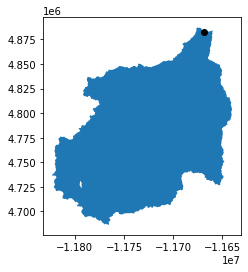

In [6]:
gageloc = NLDI().getfeature_byid("nwissite", "USGS-06721000").to_crs('epsg:3857')
print(type(gageloc))
ax = plt.subplot(111)
gagebasin.plot(ax=ax)
gageloc.plot(ax=ax, color='black')

In [ ]:
gagebasin = NLDI().get_basins("06721000").to_crs('epsg:3857')
gageloc = NLDI().getfeature_byid("nwissite", "USGS-06721000").to_crs('epsg:3857')
cid = gageloc.comid.values.astype(str)
print(cid,gageloc.comid.values.astype(int)[0], cid[0]) 
# strmseg_basin = NLDI().getfeature_byid("comid", cid[0], basin=True).to_crs('epsg:3857')
strmseg_loc = NLDI().getfeature_byid("comid", cid[0]).to_crs('epsg:3857')
print(type(strmseg_loc))